## Final analysis - THESIS 2025
Total:40 participants. 2BLV. Balanced final sample: 38 Participants / 16 experienced vs 16 randomly sampled non-experienced (May, 2025)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as scistats
import csv

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle
import seaborn as sns
import pingouin as pg

In [2]:
import astropy
from astropy import stats

In [3]:
data = pd.read_csv("corot_data_clean.csv", delimiter=';')#clean data
data

,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
0,0,NaN,NaN,RESULTS,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,NaN,NaN,NaN,NaN,NaN,Sí,Sí,NaN,NaN,NaN
1,1,3/13/24 12:57:24,3/13/24 13:05:09,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
2,2,3/13/24 16:59:23,3/13/24 17:13:42,anonymous,NaN,NaN,NaN,NaN,"""K"" <=> ""D"" = Re","""O"" <=> ""C"" = Do",...,Interés en noticias y documentales de Astronomía,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
3,3,3/13/24 17:37:19,3/13/24 17:43:03,anonymous,NaN,NaN,NaN,NaN,"""O"" <=> ""C"" = Do","""G"" <=> ""G"" = Sol",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,No,No,España,NaN,NaN
4,4,3/13/24 17:29:31,3/13/24 17:46:40,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
5,5,3/14/24 21:25:08,3/14/24 21:33:09,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""K"" <=> ""D"" = Re","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
6,6,3/14/24 22:39:42,3/14/24 22:46:18,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""F"" <=> ""F"" = Fa","""O"" <=> ""C"" = Do",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN
7,7,3/16/24 0:27:07,3/16/24 0:38:02,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""F"" <=> ""F"" = Fa",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Pérdida leve de audición con diagnóstico médico,Entre 25 y 34,Sí,Sí,España,NaN,NaN
8,8,3/16/24 16:39:19,3/16/24 16:47:28,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""B"" <=> ""B"" = Si","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Entre 55 y 64,Sí,No,España,NaN,NaN
9,9,3/17/24 20:57:53,3/17/24 21:05:32,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN


In [4]:
blv_inc = pd.read_csv("corot_data_edited.csv", delimiter=';')#raw data
blv_inc

,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
0,0,NaN,NaN,RESULTS,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,NaN,NaN,NaN,NaN,NaN,Sí,Sí,NaN,NaN,NaN
1,1,3/13/24 12:57:24,3/13/24 13:05:09,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
2,2,3/13/24 16:59:23,3/13/24 17:13:42,anonymous,NaN,NaN,NaN,NaN,"""K"" <=> ""D"" = Re","""O"" <=> ""C"" = Do",...,Interés en noticias y documentales de Astronomía,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
3,3,3/13/24 17:37:19,3/13/24 17:43:03,anonymous,NaN,NaN,NaN,NaN,"""O"" <=> ""C"" = Do","""G"" <=> ""G"" = Sol",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,No,No,España,NaN,NaN
4,4,3/13/24 17:29:31,3/13/24 17:46:40,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
5,5,3/14/24 21:25:08,3/14/24 21:33:09,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""K"" <=> ""D"" = Re","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
6,6,3/14/24 22:39:42,3/14/24 22:46:18,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""F"" <=> ""F"" = Fa","""O"" <=> ""C"" = Do",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN
7,7,3/16/24 0:27:07,3/16/24 0:38:02,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""F"" <=> ""F"" = Fa",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Pérdida leve de audición con diagnóstico médico,Entre 25 y 34,Sí,Sí,España,NaN,NaN
8,8,3/16/24 16:39:19,3/16/24 16:47:28,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""B"" <=> ""B"" = Si","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Entre 55 y 64,Sí,No,España,NaN,NaN
9,9,3/17/24 20:57:53,3/17/24 21:05:32,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN


## Grades

In [6]:
grades = []
for i in range(1,len(data)):
    grade = 0
    if (data.Q3[i][1] == data.Q3[0][1]):
        grade += 1
    if (data.Q4[i][1] == data.Q4[0][1]):
        grade += 1    
    if (data.Q5[i][1] == data.Q5[0][1]):
        grade += 1
    if (data.Q6[i][1] == data.Q6[0][1]):
        grade += 1    
    grades.append(grade)
mode = scistats.mode(grades)
print("Grades:", grades)    
print("Mean:", np.mean(grades))
print("Median:", np.median(grades))
print("Most frequent result:", mode)

Grades: [4, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 4, 0, 3, 4, 2, 4, 4, 4, 3, 1, 1, 2, 4, 1, 1, 3, 3, 2, 3, 4, 4, 2, 4, 3, 3, 4, 2]
Mean: 2.289473684210526
Median: 2.0
Most frequent result: ModeResult(mode=array([4]), count=array([11]))


## Outlier identification

Original Grades: [4, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 4, 0, 3, 4, 2, 4, 4, 4, 3, 1, 1, 2, 4, 1, 1, 3, 3, 2, 3, 4, 4, 2, 4, 3, 3, 4, 2]
------------------------------
Potential Outliers (Z-score > |2|): []
------------------------------
Potential Outliers (IQR with multiplier 3): []
------------------------------


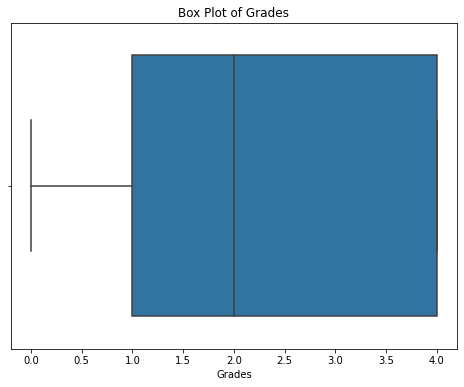

In [10]:
print("Original Grades:", grades)
print("-" * 30)

grades_nump = np.array(grades)
# --- Z-score Method with a less strict threshold ---
mean_grade = np.mean(grades_nump)
std_dev_grade = np.std(grades_nump)
z_scores = (grades - mean_grade) / std_dev_grade
z_score_outliers_relaxed = grades_nump[np.abs(z_scores) > 2]
print("Potential Outliers (Z-score > |2|):", z_score_outliers_relaxed)
print("-" * 30)

# --- IQR Method with a different multiplier ---
q1 = np.percentile(grades_nump, 25)
q3 = np.percentile(grades_nump, 75)
iqr = q3 - q1
lower_fence_wide = q1 - 1.5 * iqr
upper_fence_wide = q3 + 1.5 * iqr
iqr_outliers_wide = grades_nump[(grades_nump < lower_fence_wide) | (grades_nump > upper_fence_wide)]
print("Potential Outliers (IQR with multiplier 3):", iqr_outliers_wide)
print("-" * 30)

# --- Visualizing with a Box Plot ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=grades_nump)
plt.title("Box Plot of Grades")
plt.xlabel("Grades")
plt.show()

Conclusion: No outliers detected

# BLV analysis

In [11]:
blv_list = []
blv_index = []
blv_counter = 0
for j in range(len(blv_inc)):
    if (((blv_inc.Q11[j] == "Astronomer") or (blv_inc.Q12[j] == "Musician")) and (blv_inc.Q13[j] == "Ceguera o pérdida importante de visión")):
        blv_counter += 1
        current_row = blv_inc.iloc[j]
        blv_list.append(current_row)
        blv_index.append(j)
        
print("Number of blv:", blv_counter)
blv_df = pd.DataFrame(blv_list)
blv_df

Number of blv: 2


,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
18,18,3/23/24 19:37:58,3/23/24 20:14:56,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Astronomer,Oyente,Ceguera o pérdida importante de visión,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
39,39,5/4/24 3:26:40,5/4/24 3:38:39,anonymous,NaN,English (United States),NaN,NaN,"""M"" <=> ""E"" = Mi","""O"" <=> ""C"" = Do",...,Interés en noticias y documentales de Astronomía,Musician,Ceguera o pérdida importante de visión,Ninguno,Entre 45 y 54,Sí,Sí,U.S.,This sonification scheme is hard because it sp...,NaN


In [12]:
blv_index = []
for j in range(len(blv_df)):
    blv_index.append(blv_df.index[j])
blv_index

[18, 39]

In [13]:
grades_blv = []
for i in range(len(blv_df)):
    grade = 0
    if (blv_df.Q3[blv_index[i]][1] == data.Q3[0][1]):
        grade += 1
    if (blv_df.Q4[blv_index[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (blv_df.Q5[blv_index[i]][1] == data.Q5[0][1]):
        grade += 1
    if (blv_df.Q6[blv_index[i]][1] == data.Q6[0][1]):
        grade += 1    
    grades_blv.append(grade)
mode_blv = scistats.mode(grades_blv)
print("Grades blv:", grades_blv)    
print("Mean:", np.mean(grades_blv))
print("Median:", np.median(grades_blv))
print("Most frequent result:", mode_blv)

Grades blv: [2, 0]
Mean: 1.0
Median: 1.0
Most frequent result: ModeResult(mode=array([0]), count=array([1]))


In [14]:
blv1G = len([i for i in range(len(blv_df)) if (blv_df.Q3[blv_index[i]][1] == data.Q3[0][1])])
blv2G = len([i for i in range(len(blv_df)) if (blv_df.Q4[blv_index[i]][1] == data.Q4[0][1])])
blv3G = len([i for i in range(len(blv_df)) if (blv_df.Q5[blv_index[i]][1] == data.Q5[0][1])])
blv4G = len([i for i in range(len(blv_df)) if (blv_df.Q6[blv_index[i]][1] == data.Q6[0][1])])

In [15]:
blv_correct = [blv1G,blv2G,blv3G,blv4G]
blv_correct = np.array(blv_correct, int)
blv_correct

array([1, 1, 0, 0])

In [16]:
blv_total_responses = len(blv_df)
mean_blv_correct = np.mean(blv_correct)
print("blv answers mean in %:", mean_blv_correct/blv_total_responses)
median_blv_correct = np.median(blv_correct)
print("blv answers median in %:", median_blv_correct/blv_total_responses)

blv answers mean in %: 0.25
blv answers median in %: 0.25


In [17]:
success_blv_correct = np.sum(blv_correct)
attempts_blv_correct = 4* blv_total_responses
conf_blv_correct = astropy.stats.binom_conf_interval(success_blv_correct, attempts_blv_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_blv_correct) # Correct answers interval

[0.13286674 0.42515468]


In [18]:
blv = pd.Series(blv_correct/blv_total_responses)
blv.describe()

count    4.000000
mean     0.250000
std      0.288675
min      0.000000
25%      0.000000
50%      0.250000
75%      0.500000
max      0.500000
dtype: float64

In [19]:
Q16M = len([i for i in range(len(blv_df)) if (blv_df.Q16[blv_index[i]] == data.Q16[1])])
Q17M = len([i for i in range(len(blv_df)) if (blv_df.Q17[blv_index[i]] == data.Q17[1])])

In [20]:
blv_useful = 100 * Q16M/len(blv_df) # % That find it useful
blv_useful

100.0

In [21]:
blv_more = 100 * Q17M/len(blv_df) # % That find it useful
blv_more

100.0

In [22]:
nonblv_df = data.sample(frac=0.05, replace=False, random_state=55)
nonblv_df

,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
34,35,3/25/24 18:13:44,4/2/24 17:24:19,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Astronomer,Musician,Ninguno,Ninguno,Entre 35 y 44,No,Sí,Alemania,no entiendo bien del todo el objetivo: de la c...,NaN
3,3,3/13/24 17:37:19,3/13/24 17:43:03,anonymous,NaN,NaN,NaN,NaN,"""O"" <=> ""C"" = Do","""G"" <=> ""G"" = Sol",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,No,No,España,NaN,NaN


In [23]:
nonblv_index = []
for j in range(len(nonblv_df)):
    nonblv_index.append(nonblv_df.index[j])
nonblv_index

[34, 3]

In [24]:
grades_nonblv = []
for i in range(len(nonblv_df)):
    grade = 0
    if (nonblv_df.Q3[nonblv_index[i]][1] == data.Q3[0][1]):
        grade += 1
    if (nonblv_df.Q4[nonblv_index[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (nonblv_df.Q5[nonblv_index[i]][1] == data.Q5[0][1]):
        grade += 1
    if (nonblv_df.Q6[nonblv_index[i]][1] == data.Q6[0][1]):
        grade += 1    
    grades_nonblv.append(grade)
mode_nonblv = scistats.mode(grades_nonblv)
print("Grades nonblv:", grades_nonblv)    
print("Mean:", np.mean(grades_nonblv))
print("Median:", np.median(grades_nonblv))
print("Most frequent result:", mode_nonblv)

Grades nonblv: [4, 1]
Mean: 2.5
Median: 2.5
Most frequent result: ModeResult(mode=array([1]), count=array([1]))


In [25]:
nonblv1G = len([i for i in range(len(nonblv_df)) if (nonblv_df.Q3[nonblv_index[i]][1] == data.Q3[0][1])])
nonblv2G = len([i for i in range(len(nonblv_df)) if (nonblv_df.Q4[nonblv_index[i]][1] == data.Q4[0][1])])
nonblv3G = len([i for i in range(len(nonblv_df)) if (nonblv_df.Q5[nonblv_index[i]][1] == data.Q5[0][1])])
nonblv4G = len([i for i in range(len(nonblv_df)) if (nonblv_df.Q6[nonblv_index[i]][1] == data.Q6[0][1])])

In [26]:
nonblv_correct = [nonblv1G,nonblv2G,nonblv3G,nonblv4G]
nonblv_correct = np.array(nonblv_correct, int)
nonblv_correct

array([1, 1, 1, 2])

In [27]:
nonblv_total_responses = len(nonblv_df)
mean_nonblv_correct = np.mean(nonblv_correct)
print("nonblv answers mean in %:", mean_nonblv_correct/nonblv_total_responses)
median_nonblv_correct = np.median(nonblv_correct)
print("nonblv answers median in %:", median_nonblv_correct/nonblv_total_responses)

nonblv answers mean in %: 0.625
nonblv answers median in %: 0.5


In [28]:
success_nonblv_correct = np.sum(nonblv_correct)
attempts_nonblv_correct = 4* nonblv_total_responses
conf_nonblv_correct = astropy.stats.binom_conf_interval(success_nonblv_correct, attempts_nonblv_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_nonblv_correct) # Correct answers interval

[0.44894202 0.77207409]


In [29]:
nonblv = pd.Series(nonblv_correct/nonblv_total_responses)
nonblv.describe()

count    4.000
mean     0.625
std      0.250
min      0.500
25%      0.500
50%      0.500
75%      0.625
max      1.000
dtype: float64

In [30]:
Q16M = len([i for i in range(len(blv_df)) if (nonblv_df.Q16[nonblv_index[i]] == data.Q16[1])])
Q17M = len([i for i in range(len(blv_df)) if (nonblv_df.Q17[nonblv_index[i]] == data.Q17[1])])

In [31]:
nonblv_useful = 100 * Q16M/len(nonblv_df) # % That find it useful
nonblv_useful

0.0

In [32]:
nonblv_more = 100 * Q17M/len(nonblv_df) # % That find it useful
nonblv_more

50.0

## Global results

In [33]:
data.Q3[0][1]

'A'

In [34]:
Q1G = len([i for i in range(len(data)) if (data.Q3[i][1] == data.Q3[0][1])])
Q2G = len([i for i in range(len(data)) if (data.Q4[i][1] == data.Q4[0][1])])
Q3G = len([i for i in range(len(data)) if (data.Q5[i][1] == data.Q5[0][1])])
Q4G = len([i for i in range(len(data)) if (data.Q6[i][1] == data.Q6[0][1])])

In [35]:
data_correct = [Q1G-1,Q2G-1,Q3G-1,Q4G-1]
data_correct = np.array(data_correct, int)
data_correct

array([28, 24, 20, 15])

In [36]:
data_total_responses = len(data)-1
data_correct_success = 100*data_correct/data_total_responses
data_correct_success

array([73.68421053, 63.15789474, 52.63157895, 39.47368421])

In [37]:
mean_data_correct = np.mean(data_correct)
mean2 = np.mean(data_correct_success)
median_data_correct = np.median(data_correct)
median2 = np.median(data_correct_success)
mode_data_correct = scistats.mode(data_correct_success)
print("Global answers mean in %:", mean_data_correct/data_total_responses)
print("Global answers median in %:", median_data_correct/data_total_responses)
if mode_data_correct.count == 1:
    print("No mode")
else: 
    print("Global answers mode in %:", mode_data_correct)
print("Mean2:", mean2)
print("Median2:", median2)

Global answers mean in %: 0.5723684210526315
Global answers median in %: 0.5789473684210527
No mode
Mean2: 57.23684210526315
Median2: 57.89473684210526


In [38]:
data.Q3[0][1]

'A'

In [39]:
# Q3 Mode: Most frequently answered
A = len([i for i in range(len(data)) if (data.Q3[i][1] == "O")])
B = len([i for i in range(len(data)) if (data.Q3[i][1] == "B")])
C = len([i for i in range(len(data)) if (data.Q3[i][1] == "A")])
D = len([i for i in range(len(data)) if (data.Q3[i][1] == "F")])
E = len([i for i in range(len(data)) if (data.Q3[i][1] == "G")])
F = len([i for i in range(len(data)) if (data.Q3[i][1] == "K")])
G = len([i for i in range(len(data)) if (data.Q3[i][1] == "M")])
print ("Q3 correct answer:", data.Q3[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Q3 correct answer: A
O: 2
B: 2
A: 29
F: 1
G: 0
K: 3
M: 2


In [40]:
# Q4 Mode: Most frequently answered
A = len([i for i in range(len(data)) if (data.Q4[i][1] == "O")])
B = len([i for i in range(len(data)) if (data.Q4[i][1] == "B")])
C = len([i for i in range(len(data)) if (data.Q4[i][1] == "A")])
D = len([i for i in range(len(data)) if (data.Q4[i][1] == "F")])
E = len([i for i in range(len(data)) if (data.Q4[i][1] == "G")])
F = len([i for i in range(len(data)) if (data.Q4[i][1] == "K")])
G = len([i for i in range(len(data)) if (data.Q4[i][1] == "M")])
print ("Q4 correct answer:", data.Q4[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Q4 correct answer: K
O: 6
B: 2
A: 0
F: 3
G: 2
K: 25
M: 1


In [41]:
# Q5 Mode: Most frequently answered
A = len([i for i in range(len(data)) if (data.Q5[i][1] == "O")])
B = len([i for i in range(len(data)) if (data.Q5[i][1] == "B")])
C = len([i for i in range(len(data)) if (data.Q5[i][1] == "A")])
D = len([i for i in range(len(data)) if (data.Q5[i][1] == "F")])
E = len([i for i in range(len(data)) if (data.Q5[i][1] == "G")])
F = len([i for i in range(len(data)) if (data.Q5[i][1] == "K")])
G = len([i for i in range(len(data)) if (data.Q5[i][1] == "M")])
print ("Q5 correct answer:", data.Q5[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Q5 correct answer: M
O: 6
B: 1
A: 1
F: 4
G: 2
K: 4
M: 21


In [42]:
# Q6 Mode: Most frequently answered
A = len([i for i in range(len(data)) if (data.Q6[i][1] == "O")])
B = len([i for i in range(len(data)) if (data.Q6[i][1] == "B")])
C = len([i for i in range(len(data)) if (data.Q6[i][1] == "A")])
D = len([i for i in range(len(data)) if (data.Q6[i][1] == "F")])
E = len([i for i in range(len(data)) if (data.Q6[i][1] == "G")])
F = len([i for i in range(len(data)) if (data.Q6[i][1] == "K")])
G = len([i for i in range(len(data)) if (data.Q6[i][1] == "M")])
print ("Q6 correct answer:", data.Q6[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Q6 correct answer: G
O: 3
B: 3
A: 2
F: 4
G: 16
K: 6
M: 5


In [43]:
success_data_correct = np.sum(data_correct)
attempts_data_correct = 4* data_total_responses
conf_data_correct = astropy.stats.binom_conf_interval(success_data_correct, attempts_data_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_data_correct) # Correct answers interval

[0.53189552 0.61189285]


In [44]:
glob =pd.Series(data_correct/data_total_responses)
glob.describe()

count    4.000000
mean     0.572368
std      0.146323
min      0.394737
25%      0.493421
50%      0.578947
75%      0.657895
max      0.736842
dtype: float64

In [45]:
Q16G = len([i for i in range(len(blv_inc)) if (blv_inc.Q16[i] == blv_inc.Q16[1])])
Q17G = len([i for i in range(len(blv_inc)) if (blv_inc.Q17[i] == blv_inc.Q17[1])])

In [46]:
Q16G

37

In [47]:
Q17G

30

In [48]:
useful = 100 * (Q16G-1)/(len(blv_inc)-1) # % That find it useful
useful

90.0

In [49]:
want_more = 100 * (Q17G-1)/(len(blv_inc)-1) # % That want to listen more
want_more

72.5

## Appending results

In [50]:
column_list = ["Global", "Experienced", "Non-experienced", "AstroNonMus", "MusNonAstro", "Astromus", "Nothing", "BLV", "Non-BLV"]
participants_list = []
success_list = []
Jeff_low_list = []
Jeff_high_list = []
std_list = []
useful_list = []
more_list = []

In [51]:
participants_list.append(data_total_responses)
success_list.append(glob.describe()["mean"])
Jeff_low_list.append(conf_data_correct[0])
Jeff_high_list.append(conf_data_correct[1])
std_list.append(glob.describe()["std"])
useful_list.append(useful)
more_list.append(want_more)

## Experienced: Astronomers or Musicians

In [52]:
experts_list = []
experts_index = []
experts_counter = 0
for j in range(len(data)):
    if (((data.Q11[j] == "Astronomer") or (data.Q12[j] == "Musician")) and not (data.Q13[j] == "Ceguera o pérdida importante de visión")):
        experts_counter += 1
        current_row = data.iloc[j]
        experts_list.append(current_row)
        experts_index.append(j)
        
print("Number of Experts:", experts_counter)
experts_df = pd.DataFrame(experts_list)
experts_df

Number of Experts: 16


,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
12,12,3/18/24 19:11:31,3/18/24 19:24:41,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Astronomer,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
14,14,3/20/24 9:51:22,3/20/24 9:56:27,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
15,15,3/20/24 11:24:26,3/20/24 11:43:58,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 55 y 64,Sí,Sí,España,NaN,NaN
19,20,3/24/24 18:58:21,3/24/24 19:04:39,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
23,24,3/25/24 21:33:07,3/25/24 21:46:53,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,spain,NaN,NaN
27,28,3/27/24 12:11:16,3/27/24 12:14:25,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
28,29,3/27/24 17:42:28,3/27/24 17:50:17,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Ninguno,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
29,30,3/27/24 17:55:08,3/27/24 18:01:10,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Astronomer,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
30,31,3/27/24 20:50:55,3/27/24 21:04:39,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
32,33,3/28/24 16:16:06,3/28/24 16:28:21,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Menos de 18,Sí,Sí,España,NaN,NaN


In [53]:
grades_experts = []
for i in range(len(experts_df)):
    grade = 0
    if (experts_df.Q3[experts_index[i]][1] == data.Q3[0][1]):
        grade += 1
    if (experts_df.Q4[experts_index[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (experts_df.Q5[experts_index[i]][1] == data.Q5[0][1]):
        grade += 1
    if (experts_df.Q6[experts_index[i]][1] == data.Q6[0][1]):
        grade += 1    
    grades_experts.append(grade)
mode_experts = scistats.mode(grades_experts)
print("Grades experts:", grades_experts)    
print("Mean:", np.mean(grades_experts))
print("Median:", np.median(grades_experts))
print("Most frequent result:", mode_experts)

Grades experts: [4, 3, 4, 4, 2, 3, 3, 2, 3, 4, 2, 4, 3, 3, 4, 2]
Mean: 3.125
Median: 3.0
Most frequent result: ModeResult(mode=array([3]), count=array([6]))


In [54]:
experts_means = np. array(grades_experts)/questions
print(experts_means)
t_test(experts_means, questions, null_value)

[1.   0.75 1.   1.   0.5  0.75 0.75 0.5  0.75 1.   0.5  1.   0.75 0.75
 1.   0.5 ]


(12.725963768852786, 1.929123726291546e-09, 15)

In [55]:
# Q3 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == "O")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == "B")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == "A")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == "F")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == "G")])
F = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == "K")])
G = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q3 correct answer:", data.Q3[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 15
Q3 correct answer: A
O: 0
B: 1
A: 15
F: 0
G: 0
K: 0
M: 0


In [56]:
# Q4 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == "O")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == "B")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == "A")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == "F")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == "G")])
F = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == "K")])
G = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q4 correct answer:", data.Q4[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 14
Q4 correct answer: K
O: 1
B: 0
A: 0
F: 0
G: 0
K: 14
M: 1


In [57]:
# Q5 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == "O")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == "B")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == "A")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == "F")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == "G")])
F = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == "K")])
G = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q5 correct answer:", data.Q5[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 13
Q5 correct answer: M
O: 0
B: 0
A: 1
F: 1
G: 0
K: 1
M: 13


In [58]:
# Q6 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == "O")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == "B")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == "A")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == "F")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == "G")])
F = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == "K")])
G = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q6 correct answer:", data.Q6[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 8
Q6 correct answer: G
O: 0
B: 0
A: 1
F: 3
G: 8
K: 2
M: 2


In [59]:
Q1E = len([i for i in range(len(experts_df)) if (experts_df.Q3[experts_index[i]][1] == data.Q3[0][1])])
Q2E = len([i for i in range(len(experts_df)) if (experts_df.Q4[experts_index[i]][1] == data.Q4[0][1])])
Q3E = len([i for i in range(len(experts_df)) if (experts_df.Q5[experts_index[i]][1] == data.Q5[0][1])])
Q4E = len([i for i in range(len(experts_df)) if (experts_df.Q6[experts_index[i]][1] == data.Q6[0][1])])

In [60]:
data.Q3[0][1]

'A'

In [61]:
experts_correct = [Q1E,Q2E,Q3E,Q4E]
experts_correct = np.array(experts_correct, int)
experts_correct

array([15, 14, 13,  8])

In [62]:
len(experts_df)

16

In [63]:
experts_total_responses = len(experts_df)
mean_experts_correct = np.mean(experts_correct)
median_experts_correct = np.median(experts_correct)
print("experts answers mean in %:", mean_experts_correct/experts_total_responses)
print("experts answers median in %:", median_experts_correct/experts_total_responses)

experts answers mean in %: 0.78125
experts answers median in %: 0.84375


In [64]:
success_experts_correct = np.sum(experts_correct)
attempts_experts_correct = 4* experts_total_responses
conf_experts_correct = astropy.stats.binom_conf_interval(success_experts_correct, attempts_experts_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_experts_correct) # Correct answers interval

[0.72549639 0.82829313]


In [65]:
experts = pd.Series(experts_correct/experts_total_responses)
experts.describe()

count    4.000000
mean     0.781250
std      0.194320
min      0.500000
25%      0.734375
50%      0.843750
75%      0.890625
max      0.937500
dtype: float64

In [66]:
Q16E = len([i for i in range(len(experts_df)) if (experts_df.Q16[experts_index[i]] == data.Q16[1])])
Q17E = len([i for i in range(len(experts_df)) if (experts_df.Q17[experts_index[i]] == data.Q17[1])])

In [67]:
experts_useful = 100 * Q16E/len(experts_df) # % That find it useful
experts_useful

87.5

In [68]:
experts_more = 100 * Q17E/len(experts_df) # % That want to listen more
experts_more

81.25

In [69]:
participants_list.append(experts_counter)
success_list.append(experts.describe()["mean"])
Jeff_low_list.append(conf_experts_correct[0])
Jeff_high_list.append(conf_experts_correct[1])
std_list.append(experts.describe()["std"])
useful_list.append(experts_useful)
more_list.append(experts_more)

# Non experienced

In [70]:
nonexperts_list = []
nonexperts_index = []
nonexperts_counter = 0
for j in range(len(data)):
    if ((data.Q12[j] != "Musician") and (data.Q11[j] != "Astronomer") and (data.Email[j] != 'RESULTS')):
        nonexperts_counter += 1
        current_row = data.iloc[j]
        nonexperts_list.append(current_row)
        nonexperts_index.append(j)
        
print("Number of nonexperts:", nonexperts_counter)
nonexperts_df = pd.DataFrame(nonexperts_list)
nonexperts_df

Number of nonexperts: 22


,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
1,1,3/13/24 12:57:24,3/13/24 13:05:09,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
2,2,3/13/24 16:59:23,3/13/24 17:13:42,anonymous,NaN,NaN,NaN,NaN,"""K"" <=> ""D"" = Re","""O"" <=> ""C"" = Do",...,Interés en noticias y documentales de Astronomía,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
3,3,3/13/24 17:37:19,3/13/24 17:43:03,anonymous,NaN,NaN,NaN,NaN,"""O"" <=> ""C"" = Do","""G"" <=> ""G"" = Sol",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,No,No,España,NaN,NaN
4,4,3/13/24 17:29:31,3/13/24 17:46:40,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
5,5,3/14/24 21:25:08,3/14/24 21:33:09,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""K"" <=> ""D"" = Re","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
6,6,3/14/24 22:39:42,3/14/24 22:46:18,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""F"" <=> ""F"" = Fa","""O"" <=> ""C"" = Do",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN
7,7,3/16/24 0:27:07,3/16/24 0:38:02,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""F"" <=> ""F"" = Fa",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Pérdida leve de audición con diagnóstico médico,Entre 25 y 34,Sí,Sí,España,NaN,NaN
8,8,3/16/24 16:39:19,3/16/24 16:47:28,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""B"" <=> ""B"" = Si","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Entre 55 y 64,Sí,No,España,NaN,NaN
9,9,3/17/24 20:57:53,3/17/24 21:05:32,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN
10,10,3/17/24 20:57:47,3/17/24 21:14:09,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Oyente,Ninguno,Pérdida leve de audición con diagnóstico médico,Más de 65,Sí,Sí,España,NaN,NaN


### Random downsampling

In [71]:
nonexperts_down = nonexperts_df.sample(frac=0.75, replace=False, random_state=1)
nonexperts_down

,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
25,26,3/26/24 9:51:57,3/26/24 9:59:36,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""M"" <=> ""E"" = Mi","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Oyente,Ninguno,Ninguno,Entre 45 y 54,No,No,España,Soy científico. La explicación al principio la...,NaN
21,22,3/25/24 18:28:45,3/25/24 18:36:19,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Interés en noticias y documentales de Astronomía,Escucha activa,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,Me cuesta mucho asociar los sonidos a las letr...,NaN
4,4,3/13/24 17:29:31,3/13/24 17:46:40,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
17,17,3/21/24 15:50:17,3/21/24 16:03:05,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Escucha activa,Ninguno,Ninguno,Entre 19 y 24,Sí,No,España,NaN,NaN
24,25,3/25/24 21:52:55,3/25/24 22:22:01,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Escucha activa,Ninguno,Ninguno,Entre 45 y 54,Sí,Sí,Spain,NaN,NaN
20,21,3/25/24 17:57:19,3/25/24 18:19:34,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 55 y 64,Sí,Sí,España,Mi capacidad para diferenciar sonidos es terrible,NaN
11,11,3/17/24 23:11:51,3/17/24 23:15:55,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""K"" <=> ""D"" = Re","""F"" <=> ""F"" = Fa",...,Ninguna,Ninguna,Ninguno,Ninguno,Entre 55 y 64,Sí,No,España,NaN,NaN
5,5,3/14/24 21:25:08,3/14/24 21:33:09,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""K"" <=> ""D"" = Re","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
3,3,3/13/24 17:37:19,3/13/24 17:43:03,anonymous,NaN,NaN,NaN,NaN,"""O"" <=> ""C"" = Do","""G"" <=> ""G"" = Sol",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,No,No,España,NaN,NaN
22,23,3/25/24 18:13:51,3/25/24 19:56:35,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Ninguna,Ninguna,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,Soy bastente nulo en general para distinguir n...,NaN


In [72]:
nonexperts_index = []
for j in range(len(nonexperts_down)):
    nonexperts_index.append(nonexperts_down.index[j])
nonexperts_index

[25, 21, 4, 17, 24, 20, 11, 5, 3, 22, 7, 8, 2, 18, 1, 31]

In [73]:
grades_nonexperts_down = []
for i in range(len(nonexperts_down)):
    grade = 0
    if (nonexperts_down.Q3[nonexperts_index[i]][1] == data.Q3[0][1]):
        grade += 1
    if (nonexperts_down.Q4[nonexperts_index[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (nonexperts_down.Q5[nonexperts_index[i]][1] == data.Q5[0][1]):
        grade += 1
    if (nonexperts_down.Q6[nonexperts_index[i]][1] == data.Q6[0][1]):
        grade += 1    
    grades_nonexperts_down.append(grade)
mode_nonexperts_down = scistats.mode(grades_nonexperts_down)
print("Grades Non-experts:", grades_nonexperts_down)    
print("Mean:", np.mean(grades_nonexperts_down))
print("Median:", np.median(grades_nonexperts_down))
print("Most frequent result:", mode_nonexperts_down)

Grades Non-experts: [1, 1, 2, 4, 4, 3, 0, 0, 1, 1, 2, 0, 0, 4, 4, 4]
Mean: 1.9375
Median: 1.5
Most frequent result: ModeResult(mode=array([4]), count=array([5]))


In [74]:
nonexperts_down_means = np. array(grades_nonexperts_down)/questions
print(nonexperts_down_means)
t_test(nonexperts_down_means, questions, null_value)

[0.25 0.25 0.5  1.   1.   0.75 0.   0.   0.25 0.25 0.5  0.   0.   1.
 1.   1.  ]


(3.3353127964827642, 0.004519468941865241, 15)

In [75]:
# Q3 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == "O")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == "B")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == "A")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == "F")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == "G")])
F = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == "K")])
G = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q3 correct answer:", data.Q3[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 10
Q3 correct answer: A
O: 1
B: 1
A: 10
F: 0
G: 0
K: 3
M: 1


In [76]:
# Q4 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == "O")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == "B")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == "A")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == "F")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == "G")])
F = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == "K")])
G = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q4 correct answer:", data.Q4[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 8
Q4 correct answer: K
O: 3
B: 2
A: 0
F: 2
G: 1
K: 8
M: 0


In [77]:
# Q5 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == "O")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == "B")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == "A")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == "F")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == "G")])
F = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == "K")])
G = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q5 correct answer:", data.Q5[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 7
Q5 correct answer: M
O: 2
B: 1
A: 0
F: 2
G: 2
K: 2
M: 7


In [78]:
# Q6 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == "O")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == "B")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == "A")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == "F")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == "G")])
F = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == "K")])
G = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == "M")])

answers = [A,B,C,D,E,F,G]
print ("Most frequently answered:", max(answers))

print ("Q6 correct answer:", data.Q6[0][1])
print ("O:", A)
print ("B:", B)
print ("A:", C) 
print ("F:", D)
print ("G:", E)
print ("K:", F)
print ("M:", G) 

Most frequently answered: 6
Q6 correct answer: G
O: 0
B: 3
A: 1
F: 1
G: 6
K: 2
M: 3


In [79]:
Q1X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q3[nonexperts_index[i]][1] == data.Q3[0][1])])
Q2X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q4[nonexperts_index[i]][1] == data.Q4[0][1])])
Q3X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q5[nonexperts_index[i]][1] == data.Q5[0][1])])
Q4X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q6[nonexperts_index[i]][1] == data.Q6[0][1])])

In [80]:
data.Q3[0][1]

'A'

In [81]:
nonexperts_correct = [Q1X,Q2X,Q3X,Q4X]
nonexperts_correct = np.array(nonexperts_correct, int)
nonexperts_correct

array([10,  8,  7,  6])

In [82]:
nonexperts_total_responses = len(nonexperts_down)
mean_nonexperts_correct = np.mean(nonexperts_correct)
print("nonexperts answers mean in %:", mean_nonexperts_correct/nonexperts_total_responses)
median_nonexperts_correct = np.median(nonexperts_correct)
print("nonexperts answers median in %:", median_nonexperts_correct/nonexperts_total_responses)

nonexperts answers mean in %: 0.484375
nonexperts answers median in %: 0.46875


In [83]:
success_nonexperts_correct = np.sum(nonexperts_correct)
attempts_nonexperts_correct = 4* nonexperts_total_responses
conf_nonexperts_correct = astropy.stats.binom_conf_interval(success_nonexperts_correct, attempts_nonexperts_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_nonexperts_correct) # Correct answers interval


[0.42263125 0.54660247]


In [84]:
nonexperts = pd.Series(nonexperts_correct/nonexperts_total_responses)
nonexperts.describe()

count    4.000000
mean     0.484375
std      0.106739
min      0.375000
25%      0.421875
50%      0.468750
75%      0.531250
max      0.625000
dtype: float64

In [85]:
Q16X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q16[nonexperts_index[i]] == data.Q16[1])])
Q17X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q17[nonexperts_index[i]] == data.Q17[1])])

In [86]:
data.Q16[1]

'Sí'

In [87]:
nonexperts_useful = 100 * Q16X/len(nonexperts_down) # % That find it useful
nonexperts_useful

87.5

In [88]:
nonexperts_more = 100 * Q17X/len(nonexperts_down) # % That want to listen more
nonexperts_more

62.5

In [91]:
participants_list.append(len(nonexperts_down))
success_list.append(nonexperts.describe()["mean"])
Jeff_low_list.append(conf_nonexperts_correct[0])
Jeff_high_list.append(conf_nonexperts_correct[1])
std_list.append(nonexperts.describe()["std"])
useful_list.append(nonexperts_useful)
more_list.append(nonexperts_more)

## Astronomers - no BLV

In [108]:
astro_list = []
astro_index = []
astro_counter = 0
for j in range(len(data)):
    if ((data.Q11[j] == "Astronomer") and (data.Q12[j] != "Musician") and (data.Q13[j] != "Ceguera o pérdida importante de visión")):
        astro_counter += 1
        current_row = data.iloc[j]
        astro_list.append(current_row)
        astro_index.append(j)
        
print("Number of Astronomers:", astro_counter)
astro_df = pd.DataFrame(astro_list)
astro_df

Number of Astronomers: 3


,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
33,34,3/30/24 16:18:46,3/30/24 17:12:23,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""B"" <=> ""B"" = Si","""K"" <=> ""D"" = Re",...,Astronomer,Oyente,Ninguno,Ninguno,Entre 45 y 54,Sí,Sí,Spain,NaN,NaN
35,36,4/3/24 10:52:31,4/3/24 10:58:46,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Astronomer,Oyente,Ninguno,Ninguno,Entre 25 y 34,Sí,No,Chile,NaN,NaN
38,40,5/12/24 23:21:59,5/12/24 23:26:43,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""M"" <=> ""E"" = Mi",...,Astronomer,Oyente,Ninguno,Pérdida leve de audición con diagnóstico médico,Más de 65,No,No,United States,NaN,NaN


In [109]:
astro_index = []
for j in range(len(astro_df)):
    astro_index.append(astro_df.index[j])
astro_index

[33, 35, 38]

In [110]:
astro_grades = []
for i in range(len(astro_df)):
    grade = 0
    if (astro_df.Q3[astro_index[i]][1] == data.Q3[0][1]):
        grade += 1
    if (astro_df.Q4[astro_index[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (astro_df.Q5[astro_index[i]][1] == data.Q5[0][1]):
        grade += 1
    if (astro_df.Q6[astro_index[i]][1] == data.Q6[0][1]):
        grade += 1    
    astro_grades.append(grade)
astro_mode = scistats.mode(astro_grades)
print("Grades astronomers:", astro_grades)    
print("Mean:", np.mean(astro_grades))
print("Median:", np.median(astro_grades))
print("Most frequent result:", astro_mode)

Grades astronomers: [2, 3, 2]
Mean: 2.3333333333333335
Median: 2.0
Most frequent result: ModeResult(mode=array([2]), count=array([2]))


In [111]:
astro_means = np. array(astro_grades)/questions
print(astro_means)
t_test(astro_means, questions, null_value)

[0.5  0.75 0.5 ]


(5.319999999999999, 0.033563955984957504, 2)

In [112]:
Q1A = len([i for i in range(len(astro_df)) if (astro_df.Q3[astro_index[i]][1] == data.Q3[0][1])])
Q2A = len([i for i in range(len(astro_df)) if (astro_df.Q4[astro_index[i]][1] == data.Q4[0][1])])
Q3A = len([i for i in range(len(astro_df)) if (astro_df.Q5[astro_index[i]][1] == data.Q5[0][1])])
Q4A = len([i for i in range(len(astro_df)) if (astro_df.Q6[astro_index[i]][1] == data.Q6[0][1])])

In [113]:
astro_correct = [Q1A,Q2A,Q3A,Q4A]
astro_correct = np.array(astro_correct, int)
astro_correct

array([2, 2, 3, 0])

In [114]:
astro_total_responses = len(astro_df)
mean_astro_correct = np.mean(astro_correct)
print("astronomers answers mean in %:", mean_astro_correct/astro_total_responses)
median_astro_correct = np.median(astro_correct)
print("astronomers answers median in %:", median_astro_correct/astro_total_responses)

astronomers answers mean in %: 0.5833333333333334
astronomers answers median in %: 0.6666666666666666


In [115]:
success_astro_correct = np.sum(astro_correct)
attempts_astro_correct = 4* astro_total_responses
conf_astro_correct = astropy.stats.binom_conf_interval(success_astro_correct, attempts_astro_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_astro_correct) # Correct answers interval


[0.43998837 0.71346866]


In [116]:
astro_nonmus = pd.Series(astro_correct/astro_total_responses)
astro_nonmus.describe()

count    4.000000
mean     0.583333
std      0.419435
min      0.000000
25%      0.500000
50%      0.666667
75%      0.750000
max      1.000000
dtype: float64

In [117]:
Q16A = len([i for i in range(len(astro_df)) if (astro_df.Q16[astro_index[i]] == data.Q16[1])])
Q17A = len([i for i in range(len(astro_df)) if (astro_df.Q17[astro_index[i]] == data.Q17[1])])

In [118]:
astro_useful = 100 * Q16A/len(astro_df) # % That find it useful
astro_useful

66.66666666666667

In [119]:
astro_more = 100 * Q17A/len(astro_df) # % That want to listen more
astro_more

33.333333333333336

In [120]:
participants_list.append(len(astro_df))
success_list.append(astro_nonmus.describe()["mean"])
Jeff_low_list.append(conf_astro_correct[0])
Jeff_high_list.append(conf_astro_correct[1])
std_list.append(astro_nonmus.describe()["std"])
useful_list.append(astro_useful)
more_list.append(astro_more)

## Musicians

In [121]:
mus_list = []
mus_index = []
mus_counter = 0
for j in range(len(data)):
    if ((data.Q11[j] != "Astronomer") and (data.Q12[j] == "Musician") and (data.Q13[j] != "Ceguera o pérdida importante de visión")):
        mus_counter += 1
        current_row = data.iloc[j]
        mus_list.append(current_row)
        mus_index.append(j)
        
print("Number of Musicians:", mus_counter)
mus_df = pd.DataFrame(mus_list)
mus_df

Number of Musicians: 9


,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
14,14,3/20/24 9:51:22,3/20/24 9:56:27,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
15,15,3/20/24 11:24:26,3/20/24 11:43:58,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 55 y 64,Sí,Sí,España,NaN,NaN
19,20,3/24/24 18:58:21,3/24/24 19:04:39,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
23,24,3/25/24 21:33:07,3/25/24 21:46:53,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,spain,NaN,NaN
27,28,3/27/24 12:11:16,3/27/24 12:14:25,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
28,29,3/27/24 17:42:28,3/27/24 17:50:17,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Ninguno,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
30,31,3/27/24 20:50:55,3/27/24 21:04:39,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
32,33,3/28/24 16:16:06,3/28/24 16:28:21,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Menos de 18,Sí,Sí,España,NaN,NaN
37,38,4/3/24 16:44:51,4/3/24 17:11:14,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Ninguno,Ninguno,Entre 19 y 24,Sí,No,España,NaN,NaN


## Musicians random downsampling

In [122]:
mus_down = mus_df.sample(frac=0.4, replace=False, random_state=1)
mus_down

,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
37,38,4/3/24 16:44:51,4/3/24 17:11:14,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Musician,Ninguno,Ninguno,Entre 19 y 24,Sí,No,España,NaN,NaN
19,20,3/24/24 18:58:21,3/24/24 19:04:39,anonymous,NaN,English (United States),NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
30,31,3/27/24 20:50:55,3/27/24 21:04:39,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
32,33,3/28/24 16:16:06,3/28/24 16:28:21,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Menos de 18,Sí,Sí,España,NaN,NaN


In [123]:
mus_index = []
for j in range(len(mus_down)):
    mus_index.append(mus_down.index[j])
mus_index

[37, 19, 30, 32]

In [124]:
mus_grades = []
for i in range(len(mus_down)):
    grade = 0
    if (mus_df.Q3[mus_index[i]][1] == data.Q3[0][1]):
        grade += 1
    if (mus_df.Q4[mus_index[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (mus_df.Q5[mus_index[i]][1] == data.Q5[0][1]):
        grade += 1
    if (mus_df.Q6[mus_index[i]][1] == data.Q6[0][1]):
        grade += 1    
    mus_grades.append(grade)
mus_mode = scistats.mode(mus_grades)
print("Grades musicians:", mus_grades)    
print("Mean:", np.mean(mus_grades))
print("Median:", np.median(mus_grades))
print("Most frequent result:", mus_mode)

Grades musicians: [4, 4, 3, 4]
Mean: 3.75
Median: 4.0
Most frequent result: ModeResult(mode=array([4]), count=array([3]))


In [125]:
mus_means = np. array(mus_grades)/questions
print(mus_means)
t_test(mus_means, questions, null_value)

[1.   1.   0.75 1.  ]


(12.76, 0.0010384811690007188, 3)

In [126]:
Q1M = len([i for i in range(len(mus_down)) if (mus_down.Q3[mus_index[i]][1] == data.Q3[0][1])])
Q2M = len([i for i in range(len(mus_down)) if (mus_down.Q4[mus_index[i]][1] == data.Q4[0][1])])
Q3M = len([i for i in range(len(mus_down)) if (mus_down.Q5[mus_index[i]][1] == data.Q5[0][1])])
Q4M = len([i for i in range(len(mus_down)) if (mus_down.Q6[mus_index[i]][1] == data.Q6[0][1])])

In [127]:
mus_correct = [Q1M,Q2M,Q3M,Q4M]
mus_correct = np.array(mus_correct, int)
mus_correct

array([4, 4, 3, 4])

In [128]:
mus_total_responses = len(mus_down)
mean_mus_correct = np.mean(mus_correct)
print("musicians answers mean in %:", mean_mus_correct/mus_total_responses)
median_mus_correct = np.median(mus_correct)
print("musicians answers median in %:", median_mus_correct/mus_total_responses)

musicians answers mean in %: 0.9375
musicians answers median in %: 1.0


In [129]:
success_mus_correct = np.sum(mus_correct)
attempts_mus_correct = 4* mus_total_responses
conf_mus_correct = astropy.stats.binom_conf_interval(success_mus_correct, attempts_mus_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_mus_correct) # Correct answers interval


[0.8481364  0.97386832]


In [130]:
mus = pd.Series(mus_correct/mus_total_responses)
mus.describe()

count    4.0000
mean     0.9375
std      0.1250
min      0.7500
25%      0.9375
50%      1.0000
75%      1.0000
max      1.0000
dtype: float64

In [131]:
Q16M = len([i for i in range(len(mus_down)) if (mus_down.Q16[mus_index[i]] == data.Q16[1])])
Q17M = len([i for i in range(len(mus_down)) if (mus_down.Q17[mus_index[i]] == data.Q17[1])])

In [132]:
mus_useful = 100 * Q16M/len(mus_down) # % That find it useful
mus_useful

100.0

In [133]:
mus_more = 100 * Q17M/len(mus_down) # % That want to listen more
mus_more

75.0

In [134]:
participants_list.append(len(mus_down))
success_list.append(mus.describe()["mean"])
Jeff_low_list.append(conf_mus_correct[0])
Jeff_high_list.append(conf_mus_correct[1])
std_list.append(mus.describe()["std"])
useful_list.append(mus_useful)
more_list.append(mus_more)

## Astronomers musicians

In [135]:
am_list = []
am_index = []
am_counter = 0
for j in range(len(data)):
    if ((data.Q11[j] == "Astronomer") and (data.Q12[j] == "Musician")):
        am_counter += 1
        current_row = data.iloc[j]
        am_list.append(current_row)
        am_index.append(j)
        
print("Number astronomers musicians:", am_counter)
am_df = pd.DataFrame(am_list)
am_df

Number astronomers musicians: 4


,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
12,12,3/18/24 19:11:31,3/18/24 19:24:41,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Astronomer,Musician,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
29,30,3/27/24 17:55:08,3/27/24 18:01:10,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Astronomer,Musician,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,NaN,NaN
34,35,3/25/24 18:13:44,4/2/24 17:24:19,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Astronomer,Musician,Ninguno,Ninguno,Entre 35 y 44,No,Sí,Alemania,no entiendo bien del todo el objetivo: de la c...,NaN
36,37,4/3/24 13:05:17,4/3/24 14:27:13,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Astronomer,Musician,Ninguno,Ninguno,Entre 25 y 34,Sí,Sí,Chile,NaN,NaN


In [136]:
am_grades = []
for i in range(len(am_df)):
    grade = 0
    if (am_df.Q3[am_index[i]][1] == data.Q3[0][1]):
        grade += 1
    if (am_df.Q4[am_index[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (am_df.Q5[am_index[i]][1] == data.Q5[0][1]):
        grade += 1
    if (am_df.Q6[am_index[i]][1] == data.Q6[0][1]):
        grade += 1    
    am_grades.append(grade)
am_mode = scistats.mode(am_grades)
print("Grades astronomers musicians:", am_grades)    
print("Mean:", np.mean(am_grades))
print("Median:", np.median(am_grades))
print("Most frequent result:", am_mode)

Grades astronomers musicians: [4, 2, 4, 3]
Mean: 3.25
Median: 3.5
Most frequent result: ModeResult(mode=array([4]), count=array([2]))


In [137]:
am_means = np. array(am_grades)/questions
print(am_means)
t_test(am_means, questions, null_value)

[1.   0.5  1.   0.75]


(5.619226734249926, 0.011143371221995315, 3)

In [138]:
Q1AM = len([i for i in range(len(am_df)) if (am_df.Q3[am_index[i]][1] == data.Q3[0][1])])
Q2AM = len([i for i in range(len(am_df)) if (am_df.Q4[am_index[i]][1] == data.Q4[0][1])])
Q3AM = len([i for i in range(len(am_df)) if (am_df.Q5[am_index[i]][1] == data.Q5[0][1])])
Q4AM = len([i for i in range(len(am_df)) if (am_df.Q6[am_index[i]][1] == data.Q6[0][1])])

In [139]:
am_correct = [Q1AM,Q2AM,Q3AM,Q4AM]
am_correct = np.array(am_correct, int)
am_correct

array([4, 3, 4, 2])

In [140]:
am_total_responses = len(am_df)
mean_am_correct = np.mean(am_correct)
print("astronomers musicians answers mean in %:", mean_am_correct/am_total_responses)

astronomers musicians answers mean in %: 0.8125


In [141]:
success_am_correct = np.sum(am_correct)
attempts_am_correct = 4* am_total_responses
conf_am_correct = astropy.stats.binom_conf_interval(success_am_correct, attempts_am_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_am_correct) # Correct answers interval

[0.69775168 0.88956516]


In [142]:
astromus = pd.Series(am_correct/am_total_responses)
astromus.describe()

count    4.000000
mean     0.812500
std      0.239357
min      0.500000
25%      0.687500
50%      0.875000
75%      1.000000
max      1.000000
dtype: float64

In [143]:
Q16AM = len([i for i in range(len(am_df)) if (am_df.Q16[am_index[i]] == data.Q16[1])])
Q17AM = len([i for i in range(len(am_df)) if (am_df.Q17[am_index[i]] == data.Q17[1])])

In [144]:
am_useful = 100 * Q16AM/len(am_df) # % That find it useful
am_useful

75.0

In [145]:
am_more = 100 * Q17AM/len(am_df) # % That want to listen more
am_more

100.0

In [146]:
participants_list.append(len(am_df))
success_list.append(astromus.describe()["mean"])
Jeff_low_list.append(conf_am_correct[0])
Jeff_high_list.append(conf_am_correct[1])
std_list.append(astromus.describe()["std"])
useful_list.append(am_useful)
more_list.append(am_more)

## 4 Non- experienced

In [147]:
nonexperts_down_4 = nonexperts_df.sample(frac=0.2, replace=False, random_state=1)
nonexperts_down_4

,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
25,26,3/26/24 9:51:57,3/26/24 9:59:36,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""M"" <=> ""E"" = Mi","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Oyente,Ninguno,Ninguno,Entre 45 y 54,No,No,España,Soy científico. La explicación al principio la...,NaN
21,22,3/25/24 18:28:45,3/25/24 18:36:19,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Interés en noticias y documentales de Astronomía,Escucha activa,Ninguno,Ninguno,Entre 35 y 44,Sí,Sí,España,Me cuesta mucho asociar los sonidos a las letr...,NaN
4,4,3/13/24 17:29:31,3/13/24 17:46:40,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
17,17,3/21/24 15:50:17,3/21/24 16:03:05,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Interés en noticias y documentales de Astronomía,Escucha activa,Ninguno,Ninguno,Entre 19 y 24,Sí,No,España,NaN,NaN


In [148]:
nonexperts_index_4 = []
for j in range(len(nonexperts_down_4)):
    nonexperts_index_4.append(nonexperts_down_4.index[j])
nonexperts_index_4

[25, 21, 4, 17]

In [149]:
nonexperts_grades = []
for i in range(len(nonexperts_down_4)):
    grade = 0
    if (nonexperts_df.Q3[nonexperts_index_4[i]][1] == data.Q3[0][1]):
        grade += 1
    if (nonexperts_df.Q4[nonexperts_index_4[i]][1] == data.Q4[0][1]):
        grade += 1    
    if (nonexperts_df.Q5[nonexperts_index_4[i]][1] == data.Q5[0][1]):
        grade += 1
    if (nonexperts_df.Q6[nonexperts_index_4[i]][1] == data.Q6[0][1]):
        grade += 1    
    nonexperts_grades.append(grade)
nonexperts_mode = scistats.mode(nonexperts_grades)
print("Grades nonexperts:", nonexperts_grades)    
print("Mean:", np.mean(nonexperts_grades))
print("Median:", np.median(nonexperts_grades))
print("Most frequent result:", nonexperts_mode)

Grades nonexperts: [1, 1, 2, 4]
Mean: 2.0
Median: 1.5
Most frequent result: ModeResult(mode=array([1]), count=array([2]))


In [150]:
nonexperts_means = np. array(nonexperts_grades)/questions
print(nonexperts_means)
t_test(nonexperts_means, questions, null_value)

[0.25 0.25 0.5  1.  ]


(2.0364675298172568, 0.1345032536437503, 3)

In [151]:
Q1X_4 = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q3[nonexperts_index_4[i]][1] == data.Q3[0][1])])
Q2X_4 = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q4[nonexperts_index_4[i]][1] == data.Q4[0][1])])
Q3X_4 = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q5[nonexperts_index_4[i]][1] == data.Q5[0][1])])
Q4X_4 = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q6[nonexperts_index_4[i]][1] == data.Q6[0][1])])

In [152]:
nonexperts_correct_4 = [Q1X_4,Q2X_4,Q3X_4,Q4X_4]
nonexperts_correct_4 = np.array(nonexperts_correct_4, int)
nonexperts_correct_4

array([3, 3, 1, 1])

In [153]:
nonexperts_total_responses_4 = len(nonexperts_down_4)
mean_nonexperts_correct_4 = np.mean(nonexperts_correct_4)
print("4 nonexperts success rate mean:", mean_nonexperts_correct_4/nonexperts_total_responses_4)
median_nonexperts_correct_4 = np.median(nonexperts_correct_4)
print("4 nonexperts success rate median:", median_nonexperts_correct_4/nonexperts_total_responses_4)

4 nonexperts success rate mean: 0.5
4 nonexperts success rate median: 0.5


In [154]:
success_nonexperts_correct_4 = np.sum(nonexperts_correct_4)
attempts_nonexperts_correct_4 = 4* nonexperts_total_responses_4
conf_nonexperts_correct_4 = astropy.stats.binom_conf_interval(success_nonexperts_correct_4, attempts_nonexperts_correct_4, confidence_level=0.68269, interval='jeffreys')
print(conf_nonexperts_correct_4) # Correct answers interval


[0.37878598 0.62121402]


In [155]:
nothing = pd.Series(nonexperts_correct_4/nonexperts_total_responses_4)
nothing.describe()

count    4.000000
mean     0.500000
std      0.288675
min      0.250000
25%      0.250000
50%      0.500000
75%      0.750000
max      0.750000
dtype: float64

In [156]:
Q16X_4 = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q16[nonexperts_index_4[i]] == data.Q16[1])])
Q17X_4 = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q17[nonexperts_index_4[i]] == data.Q17[1])])

In [157]:
non_experts_useful = 100 * Q16X_4/len(nonexperts_down_4) # % That find it useful
non_experts_useful

75.0

In [158]:
non_experts_more = 100 * Q17X_4/len(nonexperts_down_4) # % That want to listen more
non_experts_more

50.0

In [159]:
participants_list.append(len(nonexperts_down_4))
success_list.append(nothing.describe()["mean"])
Jeff_low_list.append(conf_nonexperts_correct_4[0])
Jeff_high_list.append(conf_nonexperts_correct_4[1])
std_list.append(nothing.describe()["std"])
useful_list.append(non_experts_useful)
more_list.append(non_experts_more)

In [160]:
success_list

[0.5723684210526315,
 0.78125,
 0.484375,
 0.5833333333333333,
 0.9375,
 0.8125,
 0.5]

In [161]:
participants_list.append(len(blv_df))
success_list.append(blv.describe()["mean"])
Jeff_low_list.append(conf_blv_correct[0])
Jeff_high_list.append(conf_blv_correct[1])
std_list.append(blv.describe()["std"])
useful_list.append(blv_useful)
more_list.append(blv_more)

In [162]:
participants_list.append(len(nonblv_df))
success_list.append(nonblv.describe()["mean"])
Jeff_low_list.append(conf_nonblv_correct[0])
Jeff_high_list.append(conf_nonblv_correct[1])
std_list.append(nonblv.describe()["std"])
useful_list.append(nonblv_useful)
more_list.append(nonblv_more)

In [173]:
np.save('correct.npy', data_correct)
np.save('experts_correct.npy', experts_correct)
np.save('nonexperts_correct.npy', nonexperts_correct)
np.save('astromus_correct.npy', am_correct)
np.save('mus_correct.npy', mus_correct)
np.save('astro_correct.npy', astro_correct)
np.save('nonexperts_4_correct.npy', nonexperts_correct_4)
np.save('blv_correct.npy', blv_correct)
np.save('nonblv_correct.npy', nonblv_correct)

np.save('grades.npy', grades)
np.save('grades_experts.npy', grades_experts)
np.save('grades_nonexperts.npy', grades_nonexperts_down)
np.save('grades_astromus.npy', am_grades)
np.save('grades_mus.npy', mus_grades)
np.save('grades_astro.npy', astro_grades)
np.save('grades_nonexperts_4.npy', nonexperts_grades)
np.save('grades_blv.npy', grades_blv)
np.save('grades_nonblv.npy', grades_nonblv)


# Normality

In [174]:
from scipy.stats import shapiro

# Test normality for each group. p-value<0.05 =>not normally distributed
stat1, p0 = shapiro(data_correct)
stat1, p1 = shapiro(experts_correct)
stat2, p2 = shapiro(nonexperts_correct)
stat3, p3 = shapiro(am_correct)
stat4, p4 = shapiro(mus_correct)
stat4, p5 = shapiro(astro_correct)
stat4, p6 = shapiro(nonexperts_correct_4)
stat4, p7 = shapiro(blv_correct)
stat4, p8 = shapiro(nonblv_correct)

print(f"global normality: p={p0}")
print(f"experts normality: p={p1}")
print(f"nonexperts normality: p={p2}")
print(f"astromus normality: p={p3}")
print(f"mus normality: p={p4}")
print(f"astro normality: p={p5}")
print(f"nonexperts-4 normality: p={p6}")
print(f"blv normality: p={p7}")
print(f"nonblv normality: p={p8}")

global normality: p=0.9750828146934509
experts normality: p=0.24012276530265808
nonexperts normality: p=0.8499705791473389
astromus normality: p=0.27245327830314636
mus normality: p=0.001240724348463118
astro normality: p=0.4063870310783386
nonexperts-4 normality: p=0.02385682798922062
blv normality: p=0.02385682798922062
nonblv normality: p=0.001240724348463118


## Exporting

In [175]:
with open("Symbolic-stats-Thesis.csv", "w") as csvfile:
    write = csv.writer(csvfile)
    write.writerow(["Group", "Participants", "Success", "conf_lo", "conf_hi", "Std", "Useful", "More"])
    for i in range(len(column_list)):
        write.writerow([column_list[i], participants_list[i], success_list[i], Jeff_low_list[i], Jeff_high_list[i], std_list[i], useful_list[i], more_list[i]])

In [176]:
plot_data = pd.read_csv("Symbolic-stats-Thesis.csv", delimiter=',')
plot_data

,Group,Participants,Success,conf_lo,conf_hi,Std,Useful,More
0,Global,38,0.572368,0.531896,0.611893,0.146323,90.000000,72.500000
1,Experienced,16,0.781250,0.725496,0.828293,0.194320,87.500000,81.250000
2,Non-experienced,16,0.484375,0.422631,0.546602,0.106739,87.500000,62.500000
3,AstroNonMus,3,0.583333,0.439988,0.713469,0.419435,66.666667,33.333333
4,MusNonAstro,4,0.937500,0.848136,0.973868,0.125000,100.000000,75.000000
5,Astromus,4,0.812500,0.697752,0.889565,0.239357,75.000000,100.000000
6,Nothing,4,0.500000,0.378786,0.621214,0.288675,75.000000,50.000000
7,BLV,2,0.250000,0.132867,0.425155,0.288675,100.000000,100.000000
8,Non-BLV,2,0.625000,0.448942,0.772074,0.250000,0.000000,50.000000


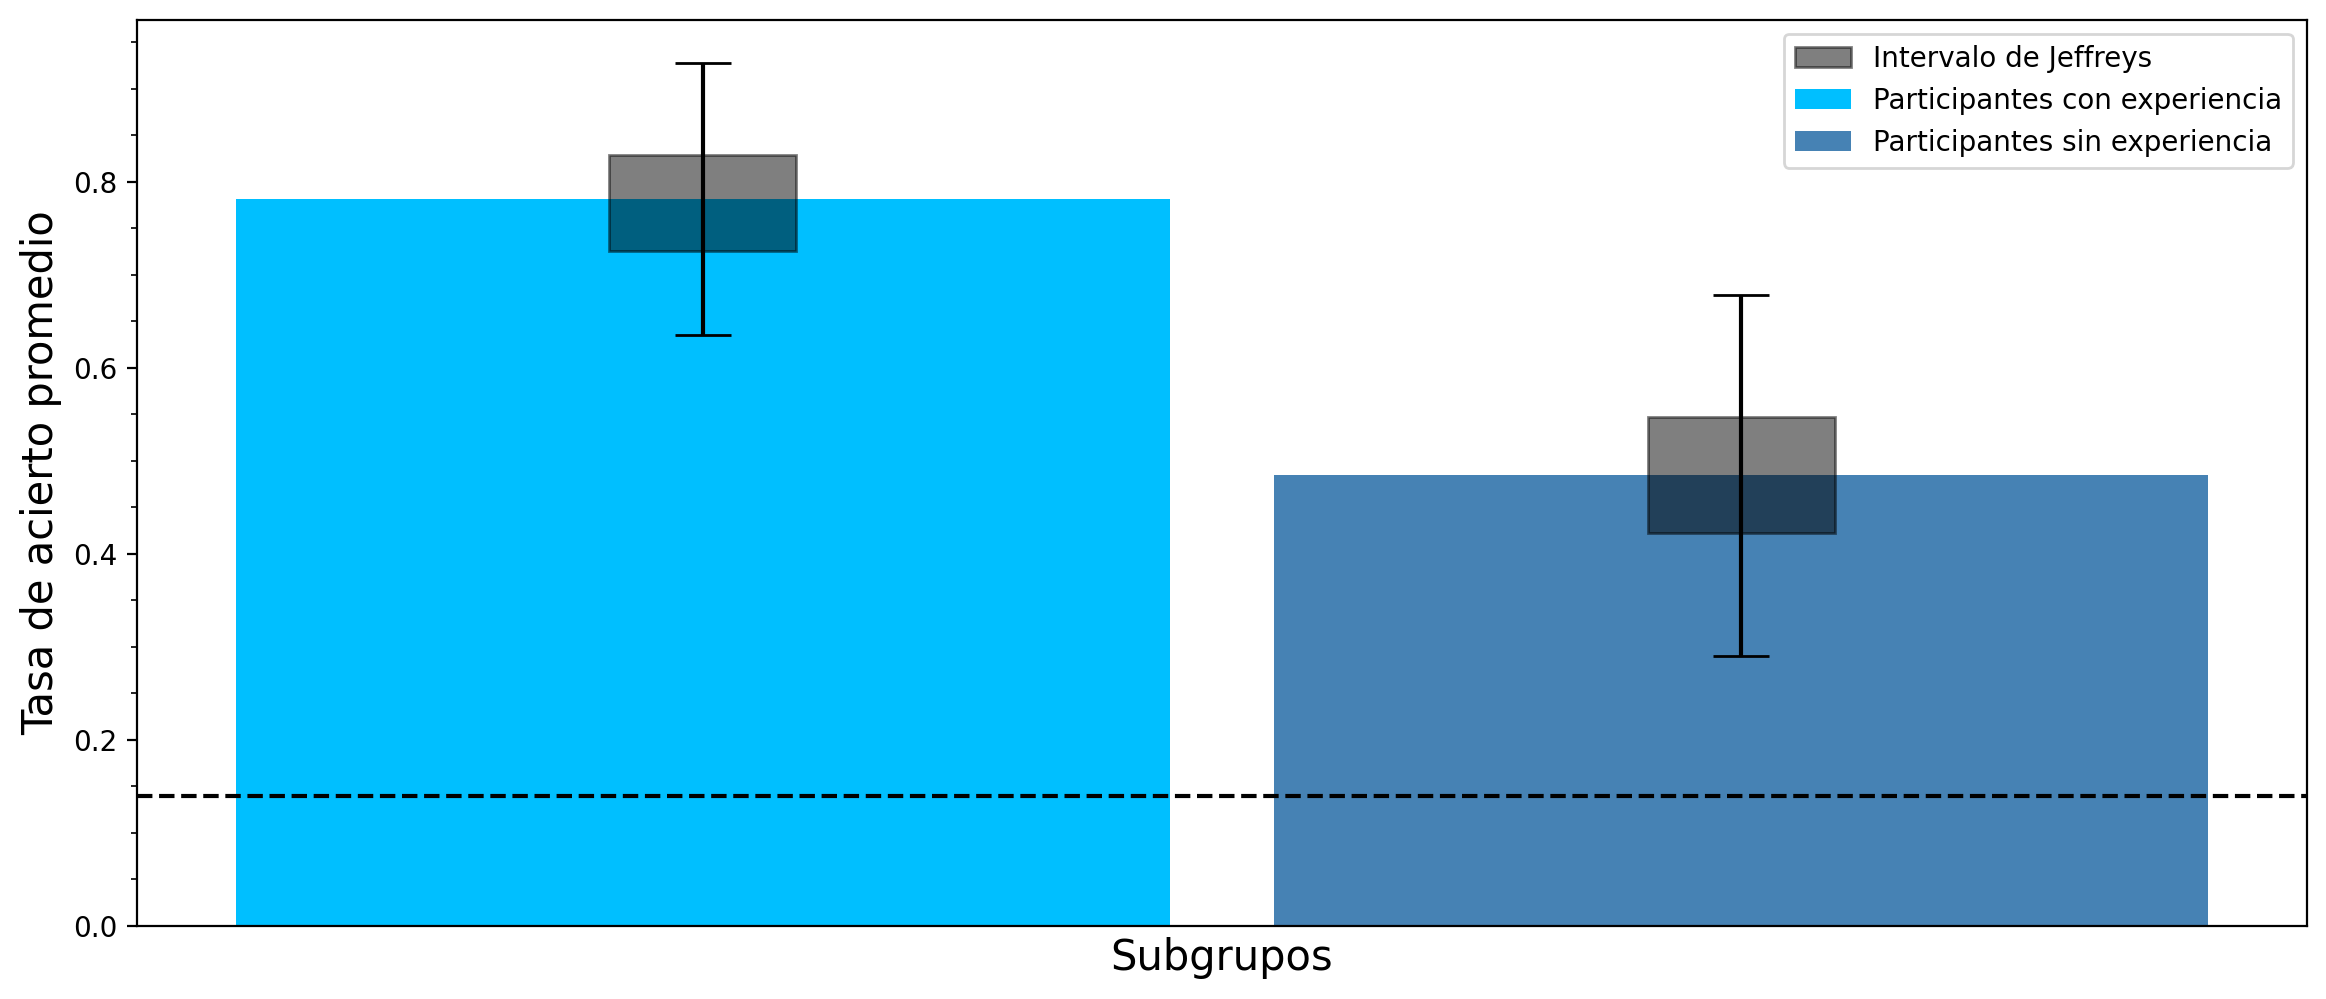

In [177]:
labels = ['Global','Experts','Non-experts']

fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))

bar_width = .9

rects1 = ax.bar(1 - bar_width/2, plot_data['Success'][1] , bar_width, yerr=plot_data['Std'][0], 
                label='Participantes con experiencia',align='center', color = 'deepskyblue', ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, plot_data['Success'][2] , bar_width, yerr=plot_data['Std'][1], 
                label='Participantes sin experiencia',align='center', color = 'steelblue', ecolor='black',capsize=10)
ax.set_ylabel('Tasa de acierto promedio',size=15)
ax.set_xlabel('Subgrupos',size=15)

ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.add_patch(Rectangle((0.46, plot_data['conf_lo'][1]), 
                       0.18, plot_data['conf_hi'][1]-plot_data['conf_lo'][1],
                       alpha=0.5,color='black',label="Intervalo de Jeffreys"))
ax.add_patch(Rectangle((1.46, plot_data['conf_lo'][2]), 
                       0.18, plot_data['conf_hi'][2]-plot_data['conf_lo'][2],
                       alpha=0.5,color='black'))

plt.axhline(y=.14, color='black', linestyle='--')

ax.set_xticks([])
ax.set_xticklabels([])

ax.legend(fontsize=10,loc='upper right')
plt.savefig('Symbolic-stats-Plot-Thesis.png')
plt.show()

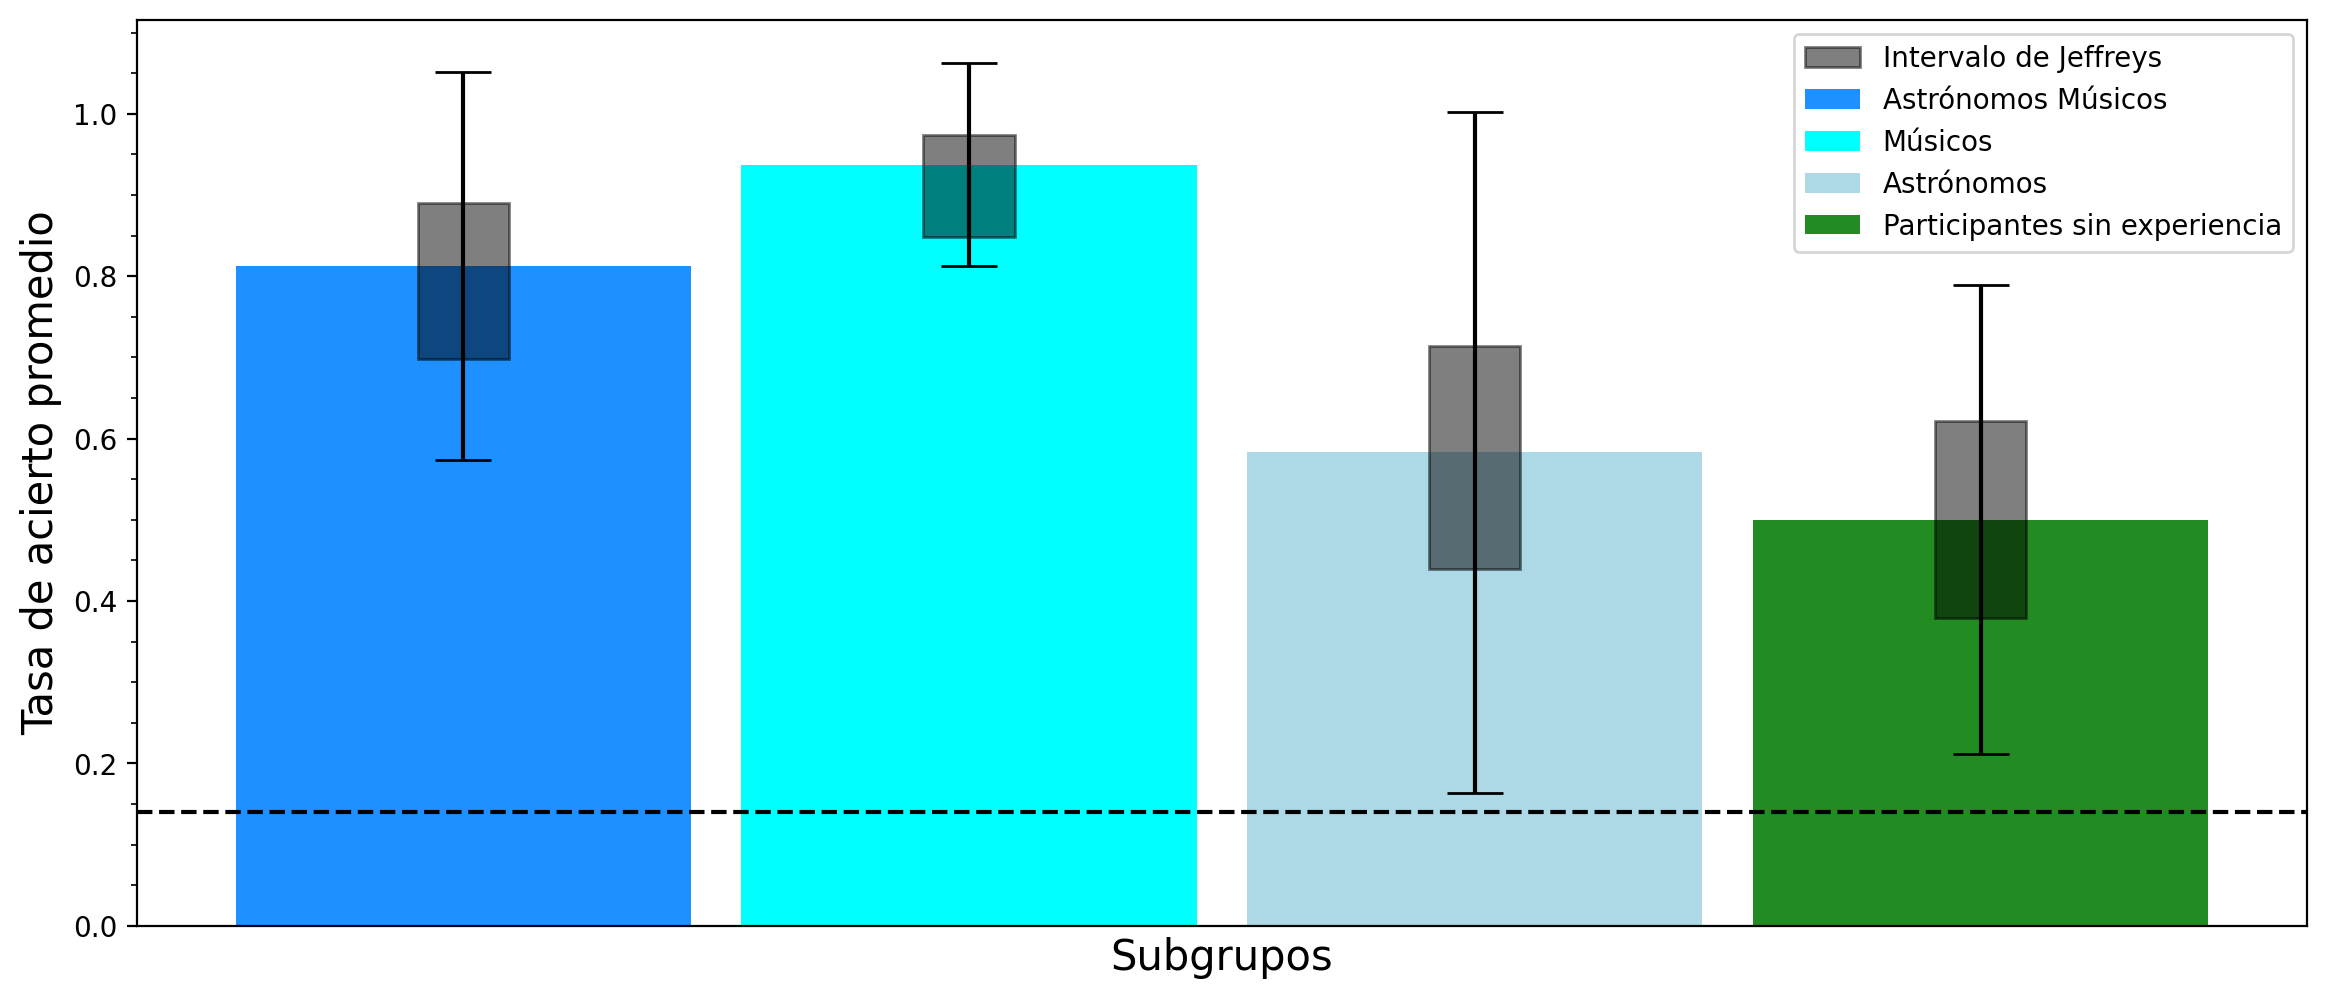

In [178]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, plot_data['Success'][5] , bar_width, yerr=plot_data['Std'][5], 
                label='Astrónomos Músicos',color='dodgerblue', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, plot_data['Success'][4] , bar_width, yerr=plot_data['Std'][4], 
                label='Músicos', color='cyan', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, plot_data['Success'][3] , bar_width, yerr=plot_data['Std'][3], 
                label='Astrónomos', color = 'lightblue', align='center',ecolor='black',capsize=10)

rects4 = ax.bar(4 - bar_width/2, plot_data['Success'][6] , bar_width, yerr=plot_data['Std'][6], 
                label='Participantes sin experiencia', color = 'forestgreen', align='center',ecolor='black',capsize=10)


ax.set_ylabel('Tasa de acierto promedio',size=15)
ax.set_xlabel('Subgrupos',size=15)

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.add_patch(Rectangle((.46, plot_data['conf_lo'][5]), 
                       0.18, plot_data['conf_hi'][5]-plot_data['conf_lo'][5],
                       alpha=0.5,color='black',label="Intervalo de Jeffreys"))
ax.add_patch(Rectangle((1.46, plot_data['conf_lo'][4]), 
                       0.18, plot_data['conf_hi'][4]-plot_data['conf_lo'][4],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, plot_data['conf_lo'][3]), 
                       0.18, plot_data['conf_hi'][3]-plot_data['conf_lo'][3],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((3.46, plot_data['conf_lo'][6]), 
                       0.18, plot_data['conf_hi'][6]-plot_data['conf_lo'][6],
                       alpha=0.5,color='black'))

plt.axhline(y=.14, color='black', linestyle='--')

ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=10,loc='upper right')
plt.savefig('Symbolic-stats-Plot-groups-Thesis.png')
plt.show()

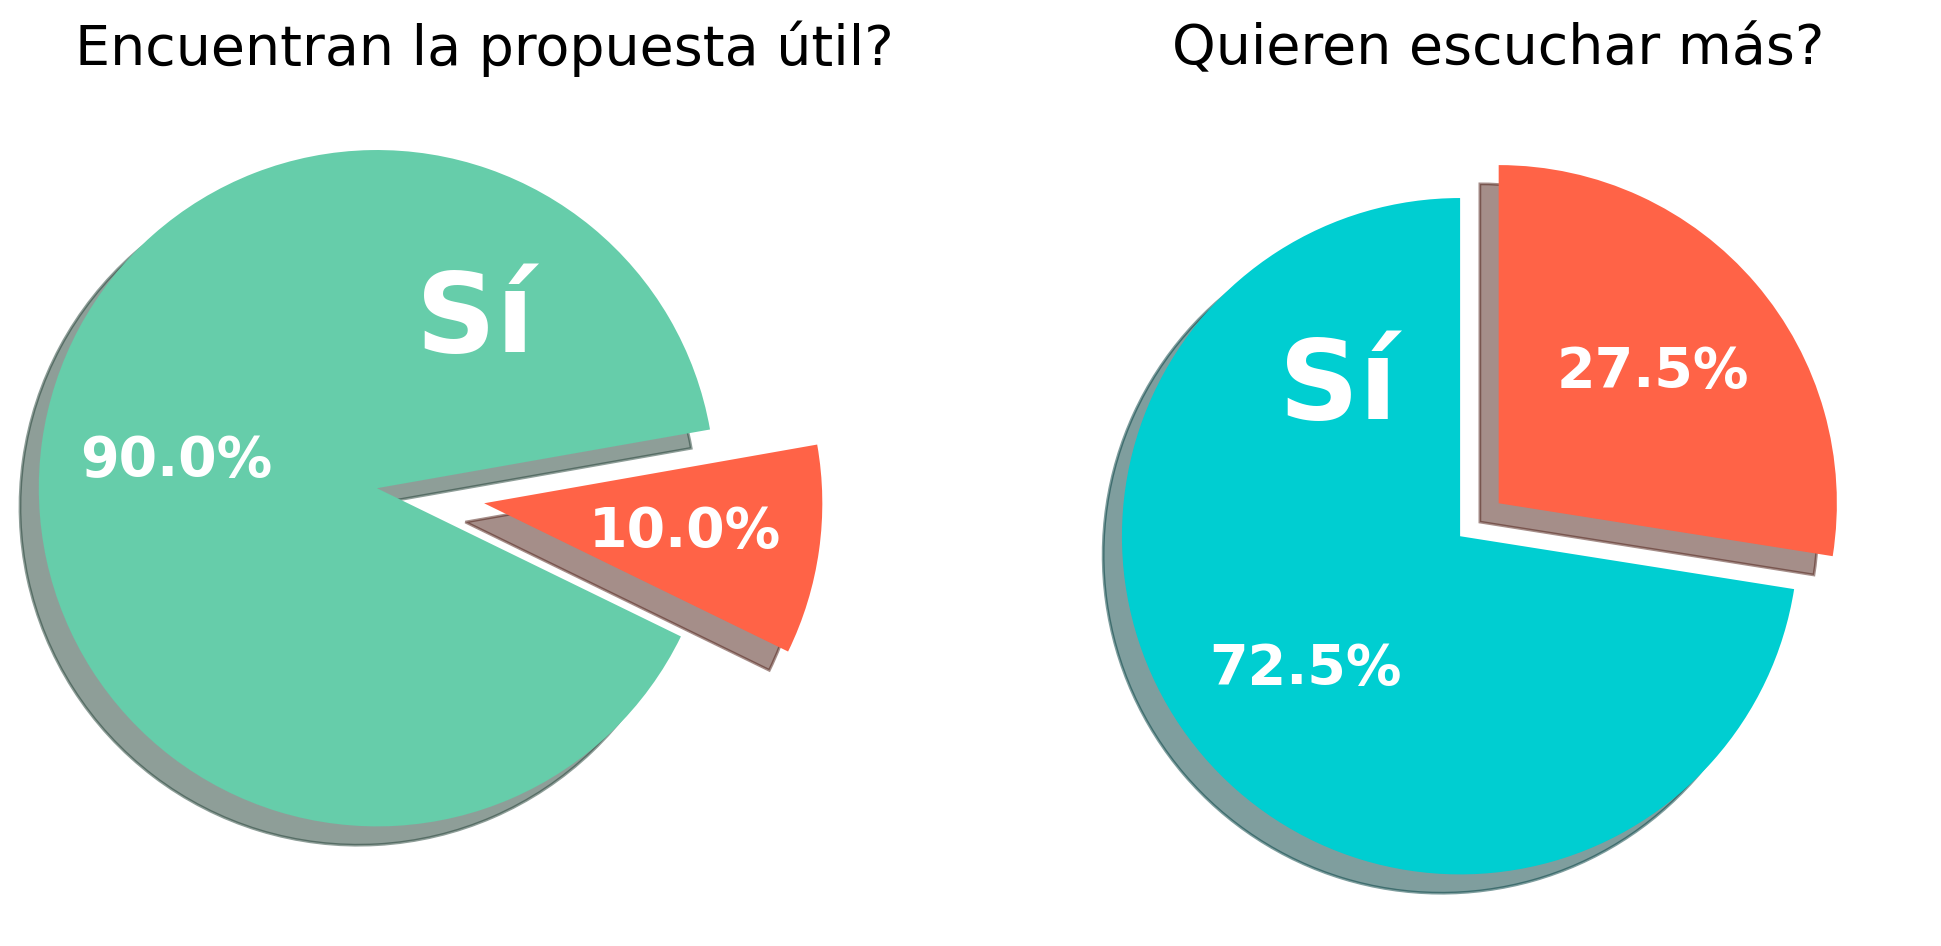

In [179]:
labels = 'Yes', 'No'
useful = [plot_data['Useful'][0], 100-plot_data['Useful'][0]]
more = [plot_data['More'][0], 100-plot_data['More'][0]]

explode = (0.32, 0)
explode2 = (0.15, 0)
fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=200)
ax[0].set_title("Encuentran la propuesta útil?", size=20)
ax[0].pie(useful, explode=explode, shadow= True, autopct='%1.1f%%', startangle=10, textprops=dict(color="w", size=20, weight="bold"), colors=['mediumaquamarine', 'tomato'])

ax[0].text(-.2,.45, 'Sí', color='w', size=40, weight="bold")
ax[1].text(-.65,.25, 'Sí', color='w', size=40, weight="bold")

ax[1].set_title("Quieren escuchar más?", size=20)
ax[1].pie(more, explode=explode2, shadow= True, autopct='%1.1f%%', startangle=90, textprops=dict(color="w", size=20, weight="bold"), colors=['darkturquoise', 'tomato'])


plt.savefig('CoRot-Global-Qualitative-Thesis.png')
plt.show()

In [180]:
np.save('correct.npy', data_correct)
np.save('experts_correct.npy', experts_correct)
np.save('nonexperts_correct.npy', nonexperts_correct)
np.save('astromus_correct.npy', am_correct)
np.save('mus_correct.npy', mus_correct)
np.save('astro_correct.npy', astro_correct)
np.save('nonexperts_4_correct.npy', nonexperts_correct_4)
np.save('blv_correct.npy', blv_correct)
np.save('nonblv_correct.npy', nonblv_correct)

np.save('grades.npy', grades)
np.save('grades_experts.npy', grades_experts)
np.save('grades_nonexperts.npy', grades_nonexperts_down)
np.save('grades_astromus.npy', am_grades)
np.save('grades_mus.npy', mus_grades)
np.save('grades_astro.npy', astro_grades)
np.save('grades_nonexperts_4.npy', nonexperts_grades)
np.save('grades_blv.npy', grades_blv)
np.save('grades_nonblv.npy', grades_nonblv)
